### 导入库

In [1]:
import os,shutil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### 查看数据集

In [3]:
base_dir = './'
train_dir = os.path.join(base_dir, 'train')
print('tatal training machine images:', len(os.listdir(train_dir)))
test_dir = os.path.join(base_dir, 'test')
print('tatal test machine images:', len(os.listdir(test_dir)))
train_on_dir = os.path.join(base_dir, 'on')
print('tatal on machine images:', len(os.listdir(train_on_dir)))
train_off_dir = os.path.join(base_dir, 'off')
print('tatal on machine images:', len(os.listdir(train_off_dir)))

tatal training machine images: 29
tatal test machine images: 21
tatal on machine images: 25
tatal on machine images: 25


### 构建卷及神经网络

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

### 每一层的参数

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

### 数据预处理

In [6]:
ima1 = os.listdir('./train') #目标目录
def read_image1(filename):
    img = Image.open('./train/'+filename).convert('RGB')
    return np.array(img)

x_train = []

for i in ima1:
    x_train.append(read_image1(i))

x_train = np.array(x_train)

y_train = []
for filename in ima1:
    y_train.append(int(filename.split('_')[0]))

y_train = np.array(y_train)

In [7]:
ima2 = os.listdir('./test')
def read_image2(filename):
    img = Image.open('./test/'+filename).convert('RGB')
    return np.array(img)

x_test = []

for i in ima2:
    x_test.append(read_image2(i))

x_test = np.array(x_test)
# print(x_test)
y_test = []
for filename in ima2:
    y_test.append(int(filename.split('_')[0]))

y_test = np.array(y_test)
# print(y_test)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# print(y_train, y_test)
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#将所有图像乘以１/２５５缩放
x_train /= 255
x_test /= 255

In [8]:
#训练模型
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=10, epochs=32, verbose=1, validation_data=(x_test, y_test))
#保存模型
model.save_weights('./on_and_off.h5', overwrite=True)

#评估模型
score = model.evaluate(x_test, y_test, batch_size=10)
print(score)

Train on 29 samples, validate on 21 samples
Epoch 1/32
29/29 [==============================] - 18s 629ms/step - loss: 0.6938 - acc: 0.5172 - val_loss: 0.6916 - val_acc: 0.4286
Epoch 2/32
29/29 [==============================] - 0s 4ms/step - loss: 0.6903 - acc: 0.5172 - val_loss: 0.6741 - val_acc: 0.4286
Epoch 3/32
29/29 [==============================] - 0s 4ms/step - loss: 0.6109 - acc: 0.7241 - val_loss: 0.6205 - val_acc: 0.9524
Epoch 4/32
29/29 [==============================] - 0s 4ms/step - loss: 0.5825 - acc: 0.8621 - val_loss: 0.5211 - val_acc: 0.9524
Epoch 5/32
29/29 [==============================] - 0s 4ms/step - loss: 0.4457 - acc: 0.7931 - val_loss: 0.4042 - val_acc: 0.8571
Epoch 6/32
29/29 [==============================] - 0s 4ms/step - loss: 0.3460 - acc: 0.9310 - val_loss: 0.0776 - val_acc: 1.0000
Epoch 7/32
29/29 [==============================] - 0s 4ms/step - loss: 0.0815 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 8/32
29/29 [=========================

### 绘制结果

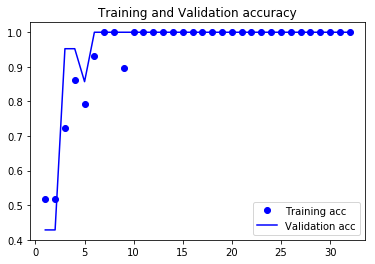

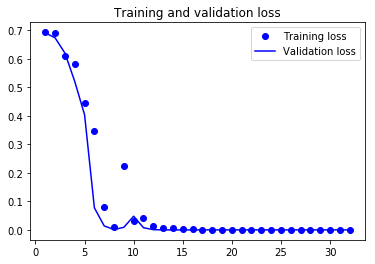

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss , 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()